Before jumping in further, let's re-load that same dataset, and while we're at it import the needed packages we'll need to make nice plots:

# Probability theory

:::{warning} Under construction
This notebook comprises various text and code snippets for generating plots and other content for the lectures corresponding to this topic.  It is *not* a coherent set of lecture notes.  Students currently enrolled in the CCNY EAS 42000/A4200 course should refer to the lecture slides made available to them.
:::

## Intro

### Recap of last time

In the [Introductory lecture](./intro), we X.

What we'll cover here: **probability theory**.

### Today: Probability theory

Before we dive in further, a little pep talk.

Probability theory is intuitive!  Don’t be intimidated by the “theory” part.

Don't just take my word for it.  For example, from a textbook in our field, von Storch and Zwiers, "The basic ideas behind probability theory are as simple as those associated with making lists---the prospect of computing probabilities or thinking in a 'probabilistic' manner should not be intimidating."

"Probability: so easy, [crows can do it](https://arstechnica.com/science/2023/09/for-the-first-time-research-reveals-crows-use-statistical-logic/#p3)."

That said, don’t worry if it’s difficult at first!  It is a bit daunting the first few times you see it.

What I’m really trying to say is: don’t overthink it.  Your gut intuition about how likely things are will help you a lot.

And we'll work through examples, simpler ones first and then building up to more complicated ones, that should help.



## Randomness, experiments, observations, random variables

As we walk through the fundamentals of probability theory, we'll repeatedly use four examples two standard ones in teaching probability generally and that you're surely familiar with already, plus two from the Earth and atmospheric sciences (specifically, from weather and climate):
1. Flipping a coin.
2. Rolling a standard, 6-sided dice.
3. The daily maximum temperature measured at noon by a thermometer located in the Central Park weather station.
4. The daily total precipitation accumulation measured at the Central Park weather station.

### Experiments
In probability theory generally, an {term}`experiment` or {term}`trial` is a procedure that can be *infinitely* repeated and has a well-defined set of possible outcomes.

A classic example is flipping a coin.  This can be repeated arbitrarily many times, and there are exactly two possible outcomes: heads or tails.  

Another classic example is rolling a standard 6-sided dice: you can roll it as many times as you want, and there are exactly 6 possible outcomes: roll a 1, 2, 3, 4, 5, or 6.

Both the coin flip and dice roll are {term}`discrete`, meaning that each has a *finite* number of possible outcomes---two for the coin flip, six for the dice roll.

The daily maximum temperature at Central Park can also be considered an experiment.  

Unlike the {term}`discrete` coin flip and dice roll, air temperature is {term}`continuous`: there is no smallest increment between consecutive possible temperatures.  

In other words, if we had a thermometer that was infinitely accurate and precise, and we warmed up air from say 70 to 71 degrees Fahrenheit, the temperature would vary *smoothly*, i.e. *continuously*, from 70 to 71, rather than making a sequence of finite *jumps* from say 70.0 to 70.01 to 70.02...etc.

:::{note}
This is complicated by the fact that the *recorded* temperature in the Central Park weather station dataset *does* have a finite resolution, in this particular case of 0.X(CHECK) degrees Fahrenheit.  

But if the resolution of the measurement is very fine relative to the behaviors of interest, it's useful and reasonable to pretend that the measured quantity, in this case the daily maximum temperature, is continuous.

In practice, often physical quantities that are in reality continuous, like temperature, end up as effectively discrete, because they are only reported up to a finite precision.  But unless this precision is quite coarse, we can usually still usefully treat them as if they really were continuous.
:::

### Outcomes
An {term}`outcome` is a possible result of an {term}`experiment`.  

Each *outcome* is unique from all other possible outcomes.  (More formally, we say each outcome is {term}`mutually exclusive` of all other outcomes.)

:::{admonition} Q: For a single coin flip, what are the possible outcomes?
:class: dropdown
A: There are exactly two outcomes: heads or tails.  
:::

:::{admonition} Q: For a single dice roll, what are the possible outcomes?
:class: dropdown
A: There are exactly six outcomes: 1, 2, 3, 4, 5, or 6.
:::

### Sample space
The {term}`sample space` is the set of all possible {term}`outcome`s of an {term}`experiment`.  Usually denoted with a capital S: $S$.  

:::{admonition} Q: What is the sample space of a coin flip?
:class: dropdown
A: $S={H,T}$, where $H$ signifies heads and $T$ signifies tails.
:::

:::{admonition} Q: What is the sample space of a dice roll?
:class: dropdown
A: $S=\{1,2,3,4,5,6\}$.
:::

:::{admonition} Q: What is the sample space of the temperature at the Central Park weather station measured each day at local noon?
:class: dropdown
A: The entire range of physically possible temperatures, so from absolute zero, which is 0 Kelvin or equivalently -273.15 degrees Celsius, to positive infinity, since there isn't really a hard upper bound on temperature.

(Of course, the *plausible* range of noon temperatures in Central Park is finite: there's essentially no way it would ever get colder than say the coldest temperatures in Antarctica, or hotter than say the hottest temperatures ever recorded in Death Valley.  If you're curious, ChatGPTo3 provided the arguments [at this link](https://chatgpt.com/share/68012436-f998-800e-a42a-c8953e9a5dc1) that the plausible bounds in the modern climate on near-surface air temperatures *anywhere* on Earth are roughly -100 to +60 degrees Celsius.  And for NYC, its estimate is roughly -30 to +45 degC.)
:::


:::{note}
Note that the "sample" in *sample space* has a different meaning than the "sample" of quantities such as the {term}`sample mean` and {term}`sample variance`.
:::


### Events
An {term}`event` is a subset of the {term}`sample space` of an {term}`experiment`.  For example, in the case of a single dice roll, one event could be "roll a 6".  Another could be "roll an odd number;" notice that this one consists of more than one possible {term}`outcome`.

Note the distinction between *outcomes* and *events*.  because an event can be *any* subset of the {term}`sample space`.  So e.g. for the dice roll "roll an even number" is a valid event, and it occurs if any of the three, mutually exclusive outcomes of rolling a 2, rolling a 4, or rolling a 6 occur.

#### Elementary events
If an event consists of *exactly one outcome in the sample space*, then we call it an {term}`elementary event`.

:::{admonition} Q: What are all of the elementary events for the single coin flip?
:class: dropdown
A: There are two: one is the coin lands `heads`, the other is the coin lands `tails`.
:::

:::{admonition} Q: What are all of the elementary events for the single dice roll?
:class: dropdown
A: There are six: roll a 1, roll a 2, etc. through roll a 6.
:::

:::{admonition} Q: What is an example elementary event for the Central Park daily max temperature reading?
:class: dropdown
A: A value of 72.5 degrees Fahrenheit.

(Refer to the discussion above re: the distinction between continuous and discrete variables and how, in the case of measurements or computer-simulated values, we tend to treat them as continuous even if strictly speaking they are discrete, provided the resulting data's precision is fine enough compared to the variations of interest.)
:::

#### Compound events
Basically, if an event is not an {term}`elementary event`, it must be a {term}`compound event`.  That means it consists of the combination of two or more elementary events.

:::{admonition} Q: What is an example compound event for a coin flip?
:class: dropdown
A: The event of "land heads *or* tails".  Formally: $E=\{H,T\}$

(In fact for the coin flip this is pretty much the only non-trivial compound event, since there are only two possible outcomes.)

#### Mutually exclusive events
Two {term}`event`s are *mutually exclusive* if it is impossible for both to occur.

For example, in a coin flip, landing `heads` is mutually exclusive with landing `tails`: the coin can only land heads up or tails up, not both.

:::{admonition} Q: For the single coin flip, give an example of two events that are *not* mutually exclusive.
:class: dropdown
A: Let $E_1=\{H\}$ and $E_2=\{H,T\}$: the first event is "land heads" and the second is "land heads or tails".  Clearly, these are not mutually exclusive, because it is possible for both to occur, namely if the coin lands heads.
:::

:::{admonition} Two dice roll examples
:::{admonition} Q: For the dice roll, is it possible to roll a 2 and a 3 on the same roll?
:class: dropdown
A: No!  Therefore, they are mutually exclusive 
:::
:::{admonition} Q: Is it possible to roll a 2 and a “2 or 3” on the same roll?
:class: dropdown
A: Yes (if you roll a 2).  They are not mutually exclusive.
:::
:::


### Random experiments
An experiment is called a {term}`random experiment` if there is more than one possible outcome; otherwise it is called *deterministic*.

In the Earth and atmospheric sciences, this concept is imperfect, but still extremely useful.  

With respect to being *imperfect*, consider, for example, the temperature measured at noon each day at the Central Park weather station.  

It can't truly be repeated *infinitely* many times (the Earth will eventually be destroyed when the Sun expands and dies.)  

(Although I guess that applies just as well to the dice roll, so I need to think through this more carefully.) .  

With respect to being *extremely useful*, we can nonetheless say that there is no meaningful end to when we can take that measurement at Central Park, and so it is "infinite enough."

(This is a particular example of a much broader issue in science: the real world is messy, and we nonetheless make good use of ideas and tools that pretend that it's not at all messy.)


### Bernoulli trial
When the {term}`sample space` of a {term}`random experiment` has exactly two possible {term}`outcome`s, and the probabilities of each outcome stay fixed across repetitions of the trial, that is called a {term}`Bernoulli trial`.

(The convention for Bernoulli trials is that you also have to designate one of the two outcomes as "success" and the other one as "failure.")

:::{admonition} Q: Can  the coin flip be considered a *Bernoulli trial*?
:class: dropdown
A: Yes.  You can designate heads as "success" and tails as "failure".  

(And  so long as the coin is flipped in the same way each time so that the probabilities of landing heads and of landing tails don't change across trials.)

(Or you could designate tails as "success" and heads as "failure", if you like tails better :P.  So long as you keep it fixed which is success across repeated coin flips.)
:::

:::{admonition} Q: Can  the coin flip be considered a *Bernoulli trial*?
:class: dropdown
A: The dice roll has six possible outcomes, not two, so it's not Bernoulli trial.  (However, if you defined your trial to be that "roll a six" is "success" and "roll anything other than a six" is a failure, than that would be a Bernoulli trial.)
:::

:::{admonition} Come up with two Bernoulli trials, one involving the Central park daily max temperature and the other involving the Central Park daily precip.
:class: dropdown
For temperature, this could be "max temperature between 75 and 80 degrees Fahrnheit is success", because that's nice weather for a day in the park, and "any max temperature outside that range is failure".

For precip, it could be "no precip is success" and "any precip is failure", again assuming you're looking to spend a nice, in this case dry, day in the park.
:::

However, there's an important distinction between these weather variables vs. the coin flip and dice roll when it comes to Bernoulli trials:
:::{admonition} Q: What required property of Bernoulli trials might be violated for the case of the daily Central Park weather variables?
:class: dropdown
That the probability of success is *fixed* across repeated trials, i.e. across different days.  For example, the probability of max temperatures between say 75 and 80 degrees Fahrenheit is much higher in June than in January.

(Even if we restrict to days in June, or even more precisely to say June 15th each year, it is possible that due e.g. to global warming, or urban heat island effects, or something else, that the probability changes from say the beginning of the record in the 19th century to present times.)
:::

:::{admonition} Come up with a Bernoulli trial that *combines* both the max temperature and precipitation.
:class: dropdown
Define "$75<T<80$ and $P=0$" as success, and anything else as failure.  That way you account for both the temperature and the rain.

:::{admonition} Q: Even still, can you think of at least two ways that this would be an imperfect guide to how pleasant the weather will be during your *afternoon* at the park?  
:class: dropdown
One: perhaps the daily max temperature happens earlier, at say 11am, and then a cold front sweeps in and makes it very chilly in the afternoon while you're there.  (False positive due to insufficient temporal resolution)

Two: perhaps the rain all comes in the evening, but during the afternoon when you are otherwise going to the park, it's totally dry.  (False negative due to insufficient temporal resolution) 

Three: perhaps the temperature is perfect and its totally dry during the afternoon for your outing, but it's an incredibly windy day, so your stuff is getting blown over and the outing ends up miserable anyways.  (False positive due to insufficient knowledge of other relevant factors)
:::
:::

### Observation
#### Definition
An {term}`observation` is simply any individual value in a given dataset we're looking at.

In the case of 5 consecutive coin flips that happened to land $H,H,T,T,H$, each individual $H$ and each individual $T$ is an observation.

In the case of consecutive dice rolls, the face up for each roll is an observation.

For the Central Park weather station daily recordings of maximum temperature and total precip, each value recorded is an observation.

#### Observations as results of experiments performed on nature
An important, and somewhat subtle, point in probability and statistics is: we consider each {term}`observation` to be the result of an {term}`experiment` performed on nature.

For the coin flip and dice roll, hopefully that's intuitive enough: the outcome of each flip or roll feels pretty random, and so it's straightforward to think of each flip or roll as a {term}`random experiment`.

But this idea is probably less intuitive for the case of the weather data.  Did we really "perform an experiment" on nature when the weather station technician wrote down the reading on the thermometer or rain gauge?

We'll circle back to this later on, once we've introduced the idea of probability *distributions*, *populations*, and *samples*.  As a preview using daily max temperature to be concrete, we essentially assume that, for any given day, there is an associated, fixed distribution of possible outcomes called the *population*, and that what that particular day's actual outcome of daily max temperature was *sampled randomly* from that population.  It is this idea of *randomly sampling from an overarching distribution of possibile outcomes* that underlies this idea that each observation is the outcome of a random experiment.

### Random variable
For our purposes, a {term}`random variable` is a {term}`function` that maps the {term}`outcome` of any {term}`observation` to a {term}`real number`.  

Why do we need this concept in addition to that of the {term}`random experiment` itself?  

Well, some random experiments don't by themselves correspond to numerical values.

:::{admonition} Q: Of our four examples (coin flip, dice roll, Central Park daily max temperature, Central Park daily precip), which one's outcomes do *not* directly correspond to a numerical value?
:class: dropdown
A: The coin flip.  Neither `heads` nor `tails` are numbers; they are words.
:::

Nevertheless, very often we want to *turn* the outcomes of experiments like this *into numbers*, so that we can do subsequent quantitative things with them.  

*That's* where the {term}`random variable` comes in: think of it as the rules that specify which number each possible outcome gets mapped to.

So, for the example of a coin flip, we could assign the outcome of `heads` to +1 and the outcome of `tails` to -1.  Then we could write our random variable $X$ formally as: 
$$
X(\omega) = 
\begin{cases}
1, & \text{if } \omega = H \\
-1, & \text{if } \omega = T
\end{cases}
$$
where $\omega \in \{T,H\}$.

:::{note}
This isn't the only possible random variable we could define to represent the coin flip.

For example, we could assign `heads` a value of -72, or $\pi^e$, or any other real number we wanted, and likewise for `tails`.

You always have the freedom to define the random variable however you want, but it's always a good idea to make it as *simple* and *useful* as possible, given whatever your purposes are.
:::

:::{admonition} Q: What might be a useful {term}`random variable` to define for the dice roll?  (Don't overthink it!)
:class: dropdown
A: Assign each face of the dice its own value!  So rolling a 1 results in a 1, rolling a 2 results in a 2, etc.

We could write this formally as $X(\omega)=\omega$, where $\omega\isin\{1,2,3,4,5,6\}$.
:::

## The 3 axioms of Probability Theory

All of probability theory builds from the **three axioms of probability**.

An {term}`axiom` is "a statement or proposition which is regarded as being established, accepted, or self-evidently true."

That maybe sounds intimidating?

Less formally, the 3 axioms are rules that we must follow when computing any probability.

And fortunately all three are very intuitive, as we’ll now see.

### The 3 axioms, intuitively
Consider a dice roll 🎲, just using your day-to-day intuitions.  

#### 1st axiom

:::{admonition} Q: If I roll a standard, six-sided dice right now, 
what’s the probability that I roll a 1?
:class: dropdown
A: **1/6**.  There are 6 faces, each equally likely to be rolled, so the chances of rolling any individual face, such as 1, is one out of six.
:::

:::{admonition} Q: If I roll a standard, six-sided dice right now, 
what’s the probability that I roll a 7 (that's a seven, not a typo)?
:class: dropdown
A: **zero**!  There is no face that is seven, so it's impossible to roll a seven, meaning the probability of rolling seven is zero.
:::

Those intuitions almost perfectly capture the **1st axiom of probability**: **non-negativity**

:::{admonition} The First Axiom of Probability, informally

The probability of an event can be positive (e.g. 1/6 to roll a 4), or it can be zero (e.g. to roll a 79), but it can’t be negative.
:::

What would it even mean to have negative likelihood?  

...it's kind of a trick question: it just doesn’t really make sense!  (To me at least; apparently there are things called "[quasiprobability distributions](https://en.wikipedia.org/wiki/Quasiprobability_distribution)" that permit [negative probabilities](https://en.wikipedia.org/wiki/Negative_probability).)

#### 2nd axiom
:::{admonition} Q: If I roll a standard, six-sided dice right now, what’s the probability that I roll 1 *or* 2 *or* 3 *or* 4 *or* 5 *or* 6? (As in any of the numbers from 1 to 6)
:class: dropdown
A: **100%**.  After all, there's no other possible outcome!
:::

That intuition almost perfectly captures the **2nd axiom of probability**: **certainty**

:::{admonition} The Second Axiom of Probability, informally
The probability that any of the possible events occurs is exactly 1 (a.k.a. “unity” or 100%).
:::

In other words, something has to happen!

#### 3rd axiom
:::{admonition} Q: If I roll a standard, six-sided dice right now, what’s the probability that:
:::{admonition} I roll a 1 *or* 2?
:class: dropdown
A: **1/3**.  That's two of the six faces, each of which is equally likely, so surely it's $1/6+1/6=2/6=1/3$.
:::
:::{admonition} I roll a 2 *or* 5 *or* 6?
:class: dropdown
A: **1/2**.  That's three of the six faces, all of which are equally likely, so surely it's $1/6+1/6+1/6=3/6=1/2$.
:::
:::

Those intuitions almost perfectly capture the **3rd axiom of probability**: **additivity**

:::{admonition} The Third Axiom of Probability, informally
If two events are {term}`mutually exclusive`, the probability that either occurs equals the sum of their individual probabilities.
:::

For example: $P(\{\text{roll 1 or 2}\}) = P(\{\text{roll 1}\}) + P(\{\text{roll 2}\}) = 1/6 + 1/6 = 1/3$

#### Putting that all together

From these thought experimens, we've arrived at simple, intuitive understanding of each of the three axioms:

1. **Non-negativity**: any probability is ${\geq}0$
2. **Certainty**: probability that *something* happens is exactly 1.
3. **Additivity**: if multiple things are mutually exclusive, the probability of *any of them* occurring is the sum of their individual probabilities of occurring.

### The 3 axioms, formally
Intuition alone got us to the bedrock of probability---the three axioms---but to make further progress we need to get more precise

The formal statements of the 3 axioms of probability are expressed in terms of a concept in mathematics called {term}`set`s.  So first we'll explain what sets are, and then we'll be able to lay out the 3 axioms.
#### Preliminaries: sets
A {term}`set` is essentially just a collection of unique items.

Each item in a set is called a {term}`member`.

We denote sets with curly brackets, $\{ \}$.  Two examples:

- $S=\{\text{heads}, \text{tails}\}$
- $S=\{1, 2, 3, 4, 5, 6\}$

#### Now, finally, the formal statements of the 3 axioms

1. **Non-negativity**: the probability $P$ of any event $E$ is at least zero: $P(E)\geq0$
2. **X**: the probability $P$ of the sample space $S$ is unity: $P(S)=1$.
3. **Additivity**: For two {term}`mutually exclusive` events $E_1$ and $E_2$, the probability of their union $E_1\cup E_2$ is the sum of their individual probabilities: $P(E_1\cup E_2)=P(E_1)+P(E_2)$

We can use these 3 axioms to formally prove other facts about probabilities.

- All probabilities are bounded by 0 and 1: for any event $E$, $0\leq P(E) \leq 1$.
- Probability of the **complement**: If $E$ is an event and $E^C$ is its complement, then $P(E^C)=1-P(E)$

:::{admonition} Exercise: Use these to prove the following: $P((E_1\cup E_2)^C)=1-P(E_1\cup E_2)=1-[P(E_1)+P(E_2)-P(E_1\cap E_2)]$
:class: dropdown

To start,
:::

## Empirical probability
### Definition
Roughly speaking, {term}`empirical probability` of some event is simply the probability of that event *that you infer directly from the real world*.

(Note that, in this context, the *real world* can mean the actual physical world or to numerical simulations with a computer.)

The word *empirical* signifies that this ratio is taken directly from the actual experiment performed, rather than from an assumed *theoretical* distribution.

More precisely, for a given {term}`event`, the ratio of the number of outcomes in which that event occurs to the total number of trials.

Formally, if we denote the number of outcomes in which the event occurs as $n$, and we denote the total number of trials as $m$, then the empirical probability is $n/m$.

Empirical probability is also known as *relative frequency* or *experimental probability*.  

All three of these names get the point across: it is the fraction of times that the event occurs



## Conditional probability
### Intuition
Fortunately, the meaning of {term}`conditional probability` is pretty intuitive: essentially, it's the probability that X occurs *given that Y has occurred*.

Another way of saying "*given that Y has occured*" is "conditioned on Y having occured."

Hence, "conditional probability" = the probability of something occurring *in the case that something else has occured*.

### Formal definition
Denoted with a vertical bar: $P(X|Y)$: “Probability of X given Y”

:::{admonition} Example: 2 consecutive coin flips.  

:::{admonition}Q: What is the sample space?
:class: dropdown
A:  ${HH, HT, TH, TT}$
:::
:::{admonition} Q: What is the probability of landing both heads?
:class: dropdown
A: **1/4**.  Four possible outcomes, all equally likely, one of which is two heads.
:::
:::{admonition} Q: What is the *conditional* probability of landing both heads *given that the first flip lands **heads***?
:class: dropdown
A: **1/2**.  Once the first flip lands heads, you've still got to get heads on the second flip, which has a 1/2 chance.
:::{admonition} Q: Wha tis the *conditional* probability of landing both heads *given that the first flip lands **tails***?
:class: dropdown
A: **0**.  Once the first flip landed tails, it's impossible for both flips to land heads.  Impossible = zero probability.
:::
:::


### Independent and dependent events
Two events are {term}`independent events` if the probability of one occurring is unchanged by whether the other occurs or not.

:::{admonition} Q: Consider two consecutive coin flips.  Is the second flip independent of the first, or not?

A: **independent**.  Each flip is separate from any other.  So whether the first flip lands heads or tails doesn't affect whether the second flip lands heads or tails.

:::{warning}
Strictly speaking, we're assuming here that there's no funny business going on---meaning the coin is flipped each time in such a way that nobody knows in advance which way it will land.

It is possible to flip a coin in such a way that the flipper has pretty good control over the outcome, and so in that case the outcomes of subsequent flips could depend on one another.

We'll assume moving forward that this isn't the case, that the flipping is done fairly each time.
:::
:::

Formally, we say two events $E_1$ and $E_2$ are independent if the probability of their {term}`intersection` equals the product of their individual probabilities: $$P(E_1\cap E_2)=P(E_1)P(E_2)\iff E_1,E_2\text{ are independent}$$

If two events that are *not* independent, then the occurence of one *does* influence the likeilhood of the other occuring.

:::{admonition} Q: Come up with an example of two events that are *not* independent for the case of two consecutive dice rolls.
A: One could be: $E_1=\{\text{the sum of the two dice is less than 8}\}$ and $E_2=\{\text{the first roll is a 5}\}$.  

Notice that, given that the first one was a 5, the second roll can only be a 1 or 2 for $E_1$ to occur; otherwise the sum will be 8 or more.

If the first roll had been anything else, the probability 
:::

## Probability distributions

A {term}`probability distribution` is a {term}`function` that tells you the probabilities of different {term}`outcome`s of an {term}`experiment`.

There are two key types of probability distributions.  The first, the {term}`probability mass function`, is for {term}`discrete` quantities.  The second, the {term}`probability density function`, is for {term}`continuous` quantities.

### Probability mass functions

For discrete random variables, the probability mass function specifies the probability of every possible outcome of that variable.  

:::{admonition} Q: What is the probability mass function for the coin flip, assuming it's a fair coin?
:class: dropdown
A: 50-50!  It's equally likely to be heads or tails, so there's a 1/2 or 50% probability of landing heads, and 1/2 or 50% probability of landing tails.
:::

:::{admonition} Q: What is the probability mass function for the 6-sided dice roll, assuming it's a fair dice? 
:class: dropdown
A: Each value, 1 through 6, would have a probability of 1/6: there's a 1 in 6 chance on any given roll that it's a 1, 1 in 6 chance that it's a 2, etc.
:::

Notice in both these cases the probability mass function summed over all possible up to exactly one...that is true for all probability mass functions.

### Probability density functions
Before defining this term, let's think about the following question:
:::{admonition} Q: What is the probability of any {term}`elementary event` in a continuous probability distribution?
:class: dropdown
A: Zero!  
:::

A {term}`probability density function` tells you the probability 

### Cumulative distribution functions

The **cumulative distribution function** (CDF) of a random variable---whether continuous or discrete---gives the probability for each possible value that the variable is less than or equal to that value.  In other words, for each value $x$, it gives the corresponding **quantile**.  As such, it always ranges from 0 (for values less than the variable's minimum value, or for $-\infty$ if there is no minimum value) to 1 (for values greater than the variable's maximum value, or for $+\infty$ if there is no maximum value).

For discrete variables, the CDF is the sum of the probability mass function over all values less than or equal to the given value: 
$$F(x_j)=\sum_{i=1}^j p(x_i),$$
where $x_j$ is the value of interest, $f(x)$ is the probability mass function, and the values of $x$ are assumed to be ordered from the smallest value $x_0$ to their largest value $x_N$.

For continuous variables, the CDF is the *integral* of the probability density function: 
$$F(x)=P(X\leq x)=\int_{-\infty}^xp(u)\,\mathrm{d}u.$$



### Linking probability mass and density functions to the cumulative distribution function

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
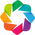

Column
    [0] Column
        [0] Markdown(str)
        [1] FloatSlider(end=5, name='Mean', start=-5)
        [2] FloatSlider(end=5, name='Standard Deviation', start=0.1, value=1)
    [1] HoloViews(DynamicMap)

In [1]:
import holoviews as hv
import numpy as np
from scipy.stats import norm
import panel as pn
from holoviews import streams

hv.extension("bokeh")


# Function to plot PDF and CDF
def plot_distribution(mean, std_dev):
    x = np.linspace(-10, 10, 400)
    pdf = norm.pdf(x, mean, std_dev)
    cdf = norm.cdf(x, mean, std_dev)

    pdf_curve = hv.Curve((x, pdf), "X", "Density").opts(
        width=400, height=400, line_color="blue"
    )
    cdf_curve = hv.Curve((x, cdf), "X", "Cumulative").opts(
        width=400, height=400, line_color="green"
    )

    return pdf_curve + cdf_curve


# Create the Panel widgets
mean_slider = pn.widgets.FloatSlider(name="Mean", start=-5, end=5, value=0)
std_dev_slider = pn.widgets.FloatSlider(
    name="Standard Deviation", start=0.1, end=5, value=1
)

# Create the Holoviews stream
dmap_stream = streams.Params(mean_slider, ["value"], rename={"value": "mean"})
dmap_stream2 = streams.Params(std_dev_slider, ["value"], rename={"value": "std_dev"})

# Create the DynamicMap
dmap = hv.DynamicMap(plot_distribution, streams=[dmap_stream, dmap_stream2])

# Layout the Panel
pn.Column(
    pn.Column("## Normal Distribution", mean_slider, std_dev_slider), dmap
).servable()

## Expectation and population mean

Conceptually, **expectation** (also known as "expected value") is simply a probability-weighted average over a random variable.  

For a discrete variable, this is
$$E[g(X)]=\sum_{i=1}^Ng(X_i)p_i,$$
where $g(X)$ is some function.

For a continuous variable, the expectation is
$$E[g(X)]=\int_{-\infty}^{\infty}g(x)p(x)\,\mathrm{d}x.$$

## Monte Carlo methods

[Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) are statistical analyses based on repeatedly drawing at random from a given distribution, and doing that many times.  (The name refers to the Monte Carlo Casino in Monaco, where a relative of one of the scientists in the Manhattan Project liked to gamble.)

### Random number generators

A [*random number generator*](https://en.wikipedia.org/wiki/Random_number_generation) is, well, something that generates a random number.

In Python, we can use the various random number generators builtin to `numpy`.  For example, to draw a random number from the standard normal distribution, we use `numpy.random.randn`.  Let's take a look at its docstring to learn more about it:

According to the docstring, if we pass it no arguments (or the value 1) it gives use one value, and if we give it a scalar it gives us that many values.  (And if we give it a list of scalars it returns an array with shape equal to that list, but that's not relevant here):

In [3]:
print(np.random.randn())
print(np.random.randn(5))

-0.10817621567663736
[ 1.06411429  0.91073388 -2.17690328 -0.76189858  0.22547547]


Notice that each time you run these commands, you'll get a different set of numbers, and it's impossible to know ahead of time precisely what those will be:

In [4]:
print(np.random.randn())
print(np.random.randn(5))

1.0246399784587001
[ 1.02146877 -0.34872778  2.07056582  2.36870512 -0.45320985]


However, these aren't *truly* random...in short, the computer has pre-computed many sequences (specifically, $2^{32}$ of them), of basically random values, and then when you run your code it quasi-randomly picks one of those sequences.  (This makes it a [pseudorandom](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) number generator.)  If we number all those different sequences from 0 to $2^{32}-1$, that number is called the **seed**.  And you can specify which seed you want using `np.random.seed`.  For example, let's set the seed to be `42` and then re-run the above code.  I am certain that the output will be: `0.4967141530112327` for the first line and `[-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]` for the second line:

In [5]:
np.random.seed(42)
print(np.random.randn())
print(np.random.randn(5))

0.4967141530112327
[-0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696]


## Theoretical distributions

### Discrete

#### Uniform

#### Binomial

### Continuous

#### Normal ("Gaussian")

The **normal distribution** is crucially important.  Its probability density is given by
$$p(x)=\frac{1}{\sqrt{2\pi}}\frac{1}{\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right),$$
where
- $\mu$ is the mean
- $\sigma$ is the standard deviation

If $\mu=0$ and $\sigma=1$, the resulting distribution is called the **standard normal**:
$$p(x)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right).$$

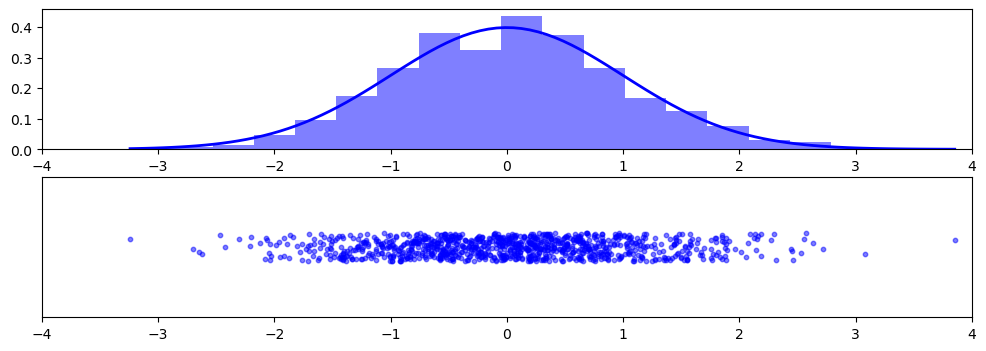

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from a standard normal distribution
samples = np.random.normal(0, 1, N)

# Apply jitter in the y-direction
jitter = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(12, 4)
)  # , gridspec_kw={'height_ratios': [1, 4]})

# Histogram and PDF
count, bins, _ = ax1.hist(samples, bins=20, density=True, alpha=0.5, color="b")
xmin, xmax = min(samples), max(samples)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
ax1.plot(x, p, "b", linewidth=2)

# Scatter plot
ax2.scatter(samples, jitter, color="b", alpha=0.5, s=10)

# Set axis limits and hide y-axis
ax1.set_xlim(-4, 4)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis
ax2.set_yticks([])

plt.show()

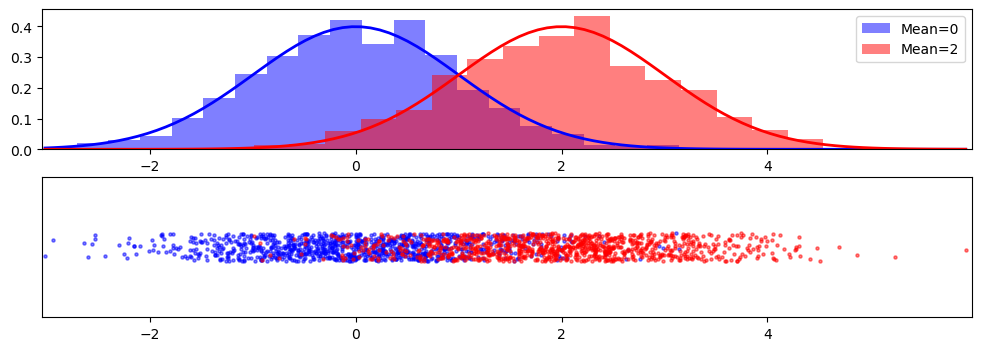

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from two different normal distributions
samples1 = np.random.normal(0, 1, N)
samples2 = np.random.normal(2, 1, N)

# Apply jitter in the y-direction
jitter1 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter2 = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

# Histogram and PDF for the first normal distribution
count1, bins1, _ = ax1.hist(
    samples1, bins=20, density=True, alpha=0.5, color="b", label="Mean=0"
)
xmin, xmax = np.min([samples1, samples2]), np.max([samples1, samples2])
x1 = np.linspace(xmin, xmax, 100)
p1 = norm.pdf(x1, 0, 1)
ax1.plot(x1, p1, "b", linewidth=2)

# Histogram and PDF for the second normal distribution
count2, bins2, _ = ax1.hist(
    samples2, bins=20, density=True, alpha=0.5, color="r", label="Mean=2"
)
x2 = np.linspace(xmin, xmax, 100)
p2 = norm.pdf(x2, 2, 1)
ax1.plot(x2, p2, "r", linewidth=2)

# Scatter plot for both distributions
ax2.scatter(samples1, jitter1, alpha=0.5, s=5, color="b")
ax2.scatter(samples2, jitter2, alpha=0.5, s=5, color="r")

# Legend and axis settings
ax1.legend()
ax1.set_xlim(1.01 * xmin, 1.01 * xmax)
ax2.set_xlim(1.01 * xmin, 1.01 * xmax)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis for the scatter plot
ax2.set_yticks([])

plt.show()

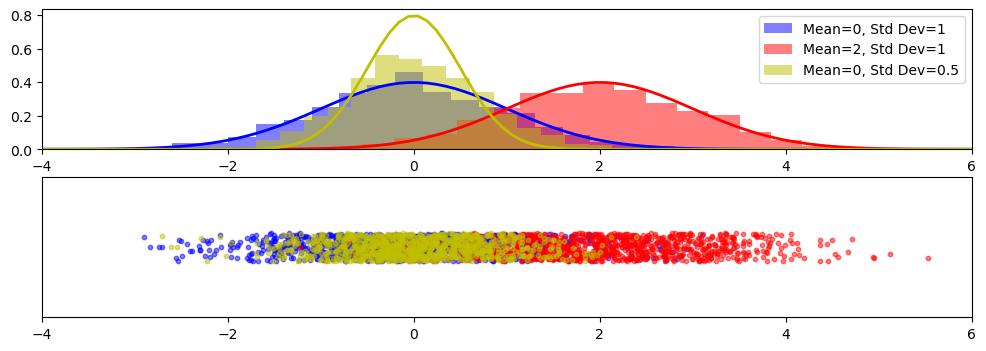

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

N = 1000  # Number of random values
jitter_amount = 0.01  # Amount of jitter

# Draw N random values from three different normal distributions
samples1 = np.random.normal(0, 1, N)  # Mean 0, std dev 1
samples2 = np.random.normal(2, 1, N)  # Mean 2, std dev 1
samples3 = np.random.normal(0, np.sqrt(0.5), N)  # Mean 0, std dev sqrt(0.5)

# Apply jitter in the y-direction
jitter1 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter2 = np.random.uniform(-jitter_amount, jitter_amount, N)
jitter3 = np.random.uniform(-jitter_amount, jitter_amount, N)

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4))

# Histogram and PDF for each normal distribution
colors = ["b", "r", "y"]
means = [0, 2, 0]
std_devs = [1, 1, 0.5]

for i, (color, mean, std_dev, samples) in enumerate(
    zip(colors, means, std_devs, [samples1, samples2, samples3])
):
    ax1.hist(
        samples,
        bins=20,
        density=True,
        alpha=0.5,
        color=color,
        label=f"Mean={mean}, Std Dev={std_dev}",
    )
    x = np.linspace(-4, 6, 100)
    p = norm.pdf(x, mean, std_dev)
    ax1.plot(x, p, color, linewidth=2)

# Scatter plot for all distributions
ax2.scatter(samples1, jitter1, alpha=0.5, s=10, color="b")
ax2.scatter(samples2, jitter2, alpha=0.5, s=10, color="r")
ax2.scatter(samples3, jitter3, alpha=0.5, s=10, color="y")

# Legend and axis settings
ax1.legend()
ax1.set_xlim(-4, 6)
ax2.set_xlim(-4, 6)
ax2.set_ylim(-jitter_amount * 5, jitter_amount * 5)

# Hide y-axis for the scatter plot
ax2.set_yticks([])

plt.show()

In [9]:
import holoviews as hv
import panel as pn
from scipy.stats import norm
import numpy as np

pn.extension()
hv.extension("bokeh")


def plot_samples(N=1000, jitter=False):
    # Generate N samples from standard normal
    samples = np.random.normal(0, 1, N)

    # Add jitter if checkbox is selected
    if jitter:
        jitter_amount = 0.01
        jitter_values = np.random.uniform(-jitter_amount, jitter_amount, N)
    else:
        jitter_values = np.zeros(N)

    # Create scatter plot
    scatter = hv.Scatter((samples, jitter_values)).opts(
        width=900,
        height=200,
        size=5,
        alpha=0.5,
        xlim=(-4, 4),
        ylim=(-0.05, 0.05),
        yaxis=None,
    )

    # Create histogram and fit normal distribution
    hist = np.histogram(samples, bins=20, density=True)
    x = np.linspace(-4, 4, 100)
    fitted_params = norm.fit(samples)
    pdf_fitted = norm.pdf(x, *fitted_params)

    histogram = hv.Histogram(hist, kdims=["Value"]).opts(
        width=900, height=200, alpha=0.5, xlim=(-4, 4)
    )

    fitted_curve = hv.Curve((x, pdf_fitted), kdims=["Value"], vdims=["Density"]).opts(
        line_width=2, color="red"
    )

    return (histogram * fitted_curve + scatter).cols(1)


# Create widgets
N_slider = pn.widgets.IntSlider(
    name="N (Number of Points)", start=100, end=5000, step=100, value=1000
)
jitter_checkbox = pn.widgets.Checkbox(name="Enable Jitter", value=False)

# Create interactive plot
interactive_plot = pn.interact(plot_samples, N=N_slider, jitter=jitter_checkbox)

# Display the interactive plot
pn.Column("# Interactive Standard Normal Sample Plot", interactive_plot).servable()

Column
    [0] Markdown(str)
    [1] Column
        [0] Column
            [0] IntSlider(end=5000, name='N (Number of Points)', start=100, step=100, value=1000)
            [1] Checkbox(name='Enable Jitter')
        [1] Row
            [0] HoloViews(Layout, name='interactive00373')

### Other probability distributions

In class, we covered the [uniform](https://en.wikipedia.org/wiki/Discrete_uniform_distribution), [binomial](https://en.wikipedia.org/wiki/Binomial_distribution), and [normal](https://en.wikipedia.org/wiki/Normal_distribution) distributions.  There are many other distributions that come up regularly in Earth and Atmospheric Sciences and statistics more generally.  These include:

- [Student's $t$](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (in tests of differences in means)
- [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution)
- [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) (for precipitation)
- [Chi-squared](https://en.wikipedia.org/wiki/Chi-squared_distribution) ($\chi^2$; in tests of differences in variance)
- [Generalized Extreme Value](https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution) (in block minima and maxima)

## Central Limit Theorem

### Conceptually

Conceptually / in essence: the sum of random variables tends to be Gaussian, whether or not the variable themselves are Gaussian.

### Formally

Formally:

Let $X_1$, ..., $X_N$ be independent and identically distributed ("IID") random variables, all with identical mean $\mu_X$ and identical (finite) variance $\sigma_X$.  *Note that, while they must be IID, their distribution does **not** have to be the Gaussian.*  Then the random variable
$$Z=\frac{\hat\mu_X-\mu_X}{\sigma_X/\sqrt{N}}$$
converges to the standard normal distribution as $N\rightarrow\infty$.

### Examples

#### Average of one or more dice rolls

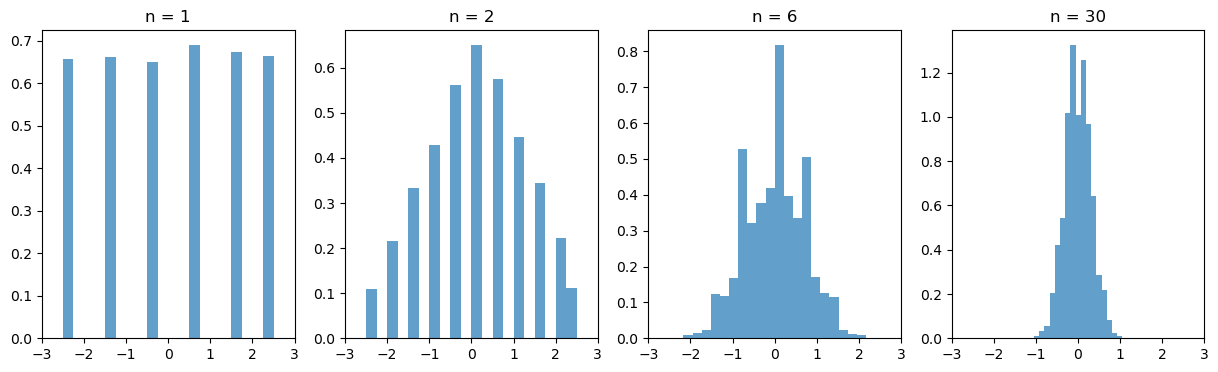

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Function to simulate rolling a die
def roll_die(n):
    return np.random.randint(1, 7, n)


# Number of simulations
num_simulations = 10000

# Different numbers of dice to roll
num_dice = [1, 2, 6, 30]

# Initialize the plot
fig, axs = plt.subplots(1, len(num_dice), figsize=(15, 4))

# Loop through each subplot and perform the simulation
for i, n in enumerate(num_dice):
    averages = []
    for _ in range(num_simulations):
        rolls = roll_die(n)
        average = np.mean(rolls)
        averages.append(average)

    # Plotting the histogram
    axs[i].hist(
        np.array(averages) - 3.5,
        bins=20,
        density=True,
        alpha=0.7,
        label="Sample Average",
    )
    axs[i].set_title(f"n = {n}")
    axs[i].set_xlim([-3, 3])

# Show plot
plt.show()

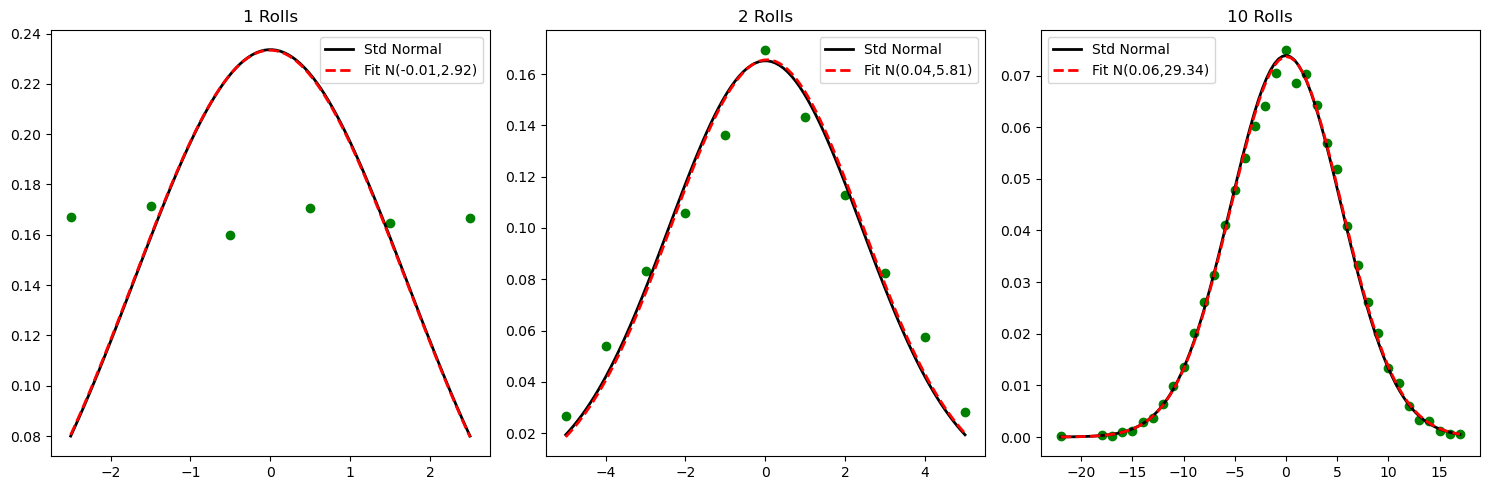

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Number of dice rolls and number of experiments
n_rolls = [1, 2, 10]
n_experiments = 10000

# Create a subplot of 1 row and len(n_rolls) columns
fig, axes = plt.subplots(1, len(n_rolls), figsize=(15, 5))

# Loop over the different number of rolls
for i, rolls in enumerate(n_rolls):
    ax = axes[i]

    # Simulate the sum of `rolls` dice rolls, `n_experiments` times
    total = np.sum(np.random.randint(1, 7, (n_experiments, rolls)), axis=1)

    # Center the data by subtracting 3.5 * rolls (the expectation)
    total_centered = total - 3.5 * rolls

    # Get unique values and their counts
    unique_vals, counts = np.unique(total_centered, return_counts=True)

    # Normalize the counts to get frequencies
    frequencies = counts / np.sum(counts)

    # Scatter plot
    ax.scatter(unique_vals, frequencies, color="g")

    # Overlay a standard normal distribution
    x = np.linspace(min(total_centered), max(total_centered), 100)
    p = norm.pdf(x, 0, np.sqrt(rolls * 35 / 12))
    ax.plot(x, p, "k", linewidth=2, label="Std Normal")

    # Fit a normal distribution to the data
    mu, std = norm.fit(total_centered)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p, "r--", linewidth=2, label=f"Fit N({mu:.2f},{std ** 2:.2f})")

    ax.set_title(f"{rolls} Rolls")
    ax.legend()

plt.tight_layout()
plt.show()

#### Galton Boards

## Conclusions

## Supplementary Materials